In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-22 17:34:44--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   494KB/s    in 8m 30s  

2020-06-22 17:43:16 (474 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#Load YOLO
net = cv2.dnn.readNet("yolov3.weights","yolo.cfg")
classes = []
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors= np.random.uniform(0,255,size=(len(classes),3))

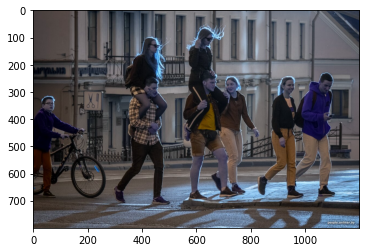

In [18]:
#loading image
img2 = cv2.imread("s1200.jpeg")
plt.imshow(img2)

In [14]:
#loading image
img = cv2.imread("6911074.jpeg")
img = cv2.resize(img,None,fx=0.4,fy=0.3)
height,width,channels = img.shape
newImage = img.copy()
#detecting objects
blob = cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)

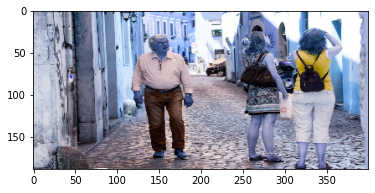

In [15]:
plt.imshow(newImage)
plt.savefig('new.jpeg')

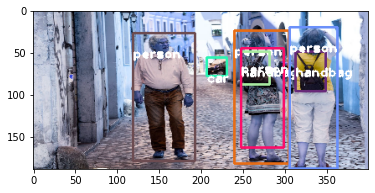

In [12]:

net.setInput(blob)
outs = net.forward(outputlayers)

#Showing info on screen/ get confidence score of algorithm in detecting an object in blob
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            #onject detected
            center_x= int(detection[0]*width)
            center_y= int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)

            #rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)
            
            boxes.append([x,y,w,h]) #put all rectangle areas
            confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
            class_ids.append(class_id) #name of the object tha was detected

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(newImage,(x,y),(x+w,y+h),color,2)
        cv2.putText(newImage,label,(x,y+30),font,1,(255,255,255),2)

plt.imshow(newImage)
plt.savefig('new.jpeg')

In [20]:
import cv2
import numpy as np

# read input image
image = cv2.imread('s1200.jpeg')

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# read class names from text file
classes = None
with open("coco.names","r") as f:
    classes = [line.strip() for line in f.readlines()]

# generate different colors for different classes 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# read pre-trained model and config file
net = cv2.dnn.readNet("yolov3.weights","yolo.cfg")

# create input blob 
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# set input blob for the network
net.setInput(blob)

In [21]:
# function to get the output layer names 
# in the architecture
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [22]:
# run inference through the network
# and gather predictions from output layers
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

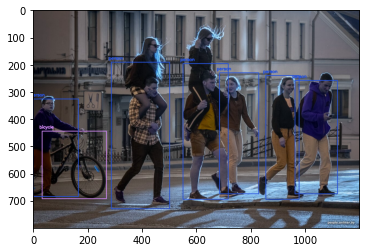

In [23]:
# apply non-max suppression
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

plt.imshow(image)
plt.savefig('new2.jpeg')